# 0. IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import missingno as msno
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# 1 INGESTIÓN O CARGA DE DATOS

In [2]:
df = pd.read_csv(r'https://breathecode.herokuapp.com/asset/internal-link?id=2326&path=adult-census-income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# 2 INSPECCIÓN INICIAL 

## 2.1 INFORMACIÓN DEL DATASET 

In [3]:
# Información general del dataset
print("INFORMACIÓN GENERAL:")
print("="*80)
df.info()

print("\n" + "="*80)

# Lista de columnas
print("COLUMNAS DEL DATASET:\n")
print(df.columns.tolist())

INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

COLUMNAS DEL DATASET:

['age', 'workclass', 'fnlwgt', 'education', 'edu

## 2.2 CLASIFICACIÓN DE COLUMNAS DEL DATASET PARA DETECTAR NÚMERICAS, CATEGÓRICAS, BOOLEANAS Y DATETIME

In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\n" + "="*80)
print("COLUMNAS NUMÉRICAS:\n")
print(numerical_cols)
print(f"Cantidad de Columnas Numéricas: {len(numerical_cols)}")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\n" + "="*80)
print("COLUMNAS CATEGÓRICAS:\n")
print(categorical_cols)
print(f"Cantidad de Columnas Categóricas: {len(categorical_cols)}")

boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()
print("\n" + "="*80)    
print("COLUMNAS BOOLEANAS:\n")
print(boolean_cols)
print(f"Cantidad de Columnas Booleanas: {len(boolean_cols)}")

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("\n" + "="*80)    
print("COLUMNAS DE FECHA Y HORA:\n")
print(datetime_cols)
print(f"Cantidad de Columnas de Fecha y Hora: {len(datetime_cols)}")


COLUMNAS NUMÉRICAS:

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Cantidad de Columnas Numéricas: 6

COLUMNAS CATEGÓRICAS:

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
Cantidad de Columnas Categóricas: 9

COLUMNAS BOOLEANAS:

[]
Cantidad de Columnas Booleanas: 0

COLUMNAS DE FECHA Y HORA:

[]
Cantidad de Columnas de Fecha y Hora: 0


## 2.3 DESCRIPCIÓN GENERAL DEL DATASET

In [5]:
df.describe(include='all').T # Include all sirve para que me muestre todas las estadísticas de todas las variables, incluyendo las categóricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.4 ANÁLISIS DE DISTRIBUCCIÓN PARA COLUMNAS NÚMERICAS

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Crear DataFrame con estadísticas de distribución
dist_stats = pd.DataFrame({
    'Variable': numerical_cols,
    'Media': [df[col].mean() for col in numerical_cols],
    'Mediana': [df[col].median() for col in numerical_cols],
    'Desv_Std': [df[col].std() for col in numerical_cols],
    'Skewness': [skew(df[col].dropna()) for col in numerical_cols],
    'Kurtosis': [kurtosis(df[col].dropna()) for col in numerical_cols]
})

# Determinar tipo de distribución
def clasificar_distribucion(skew_val, kurt_val):
    # Clasificar por skewness 
    # ¿Hacia dónde se inclina?
    if abs(skew_val) < 0.5:
        tipo_skew = "Simétrica"
    elif skew_val > 0.5:
        tipo_skew = "Asimétrica +"
    else:
        tipo_skew = "Asimétrica -"
    
    # Clasificar por kurtosis
    # ¿Qué tan puntiaguda es? 
    # La kurtosis mayor a 1 es la que me indica cuantos outliers tengo 
    # mientras mas se aleja de 1 mayor atención debo prestar a esa variable
    if kurt_val > 1:
        tipo_kurt = "Leptocúrtica"
    elif kurt_val < -1:
        tipo_kurt = "Platicúrtica"
    else:
        tipo_kurt = "Mesocúrtica"
    
    return f"{tipo_skew} | {tipo_kurt}"

dist_stats['Tipo_Distribución'] = dist_stats.apply(
    lambda row: clasificar_distribucion(row['Skewness'], row['Kurtosis']), axis=1
)

# Redondear valores para mejor visualización
dist_stats = dist_stats.round(3)

print("=" * 100)
print("ANÁLISIS DE DISTRIBUCIÓN POR VARIABLE")
print("=" * 100)
print("\nGuía de Interpretación:")
print("  • Skewness: |valor| < 0.5 (Simétrica), > 0.5 (Asimétrica +), < -0.5 (Asimétrica -)")
print("  • Kurtosis: > 1 (Leptocúrtica/Puntiaguda), < -1 (Platicúrtica/Achatada), entre -1 y 1 (Mesocúrtica/Normal)")
print("\n")

dist_stats

ANÁLISIS DE DISTRIBUCIÓN POR VARIABLE

Guía de Interpretación:
  • Skewness: |valor| < 0.5 (Simétrica), > 0.5 (Asimétrica +), < -0.5 (Asimétrica -)
  • Kurtosis: > 1 (Leptocúrtica/Puntiaguda), < -1 (Platicúrtica/Achatada), entre -1 y 1 (Mesocúrtica/Normal)




,Variable,Media,Mediana,Desv_Std,Skewness,Kurtosis,Tipo_Distribución
0,age,38.582,37.0,13.640,0.559,-0.166,Asimétrica + | Mesocúrtica
1,fnlwgt,189778.367,178356.0,105549.978,1.447,6.218,Asimétrica + | Leptocúrtica
2,education.num,10.081,10.0,2.573,-0.312,0.623,Simétrica | Mesocúrtica
3,capital.gain,1077.649,0.0,7385.292,11.953,154.775,Asimétrica + | Leptocúrtica
4,capital.loss,87.304,0.0,402.960,4.594,20.373,Asimétrica + | Leptocúrtica
5,hours.per.week,40.437,40.0,12.347,0.228,2.916,Simétrica | Leptocúrtica


## 2.5 HISTOGRAMA DE DISTRIBUCCIÓN PARA COLUMNAS NÚMERICAS

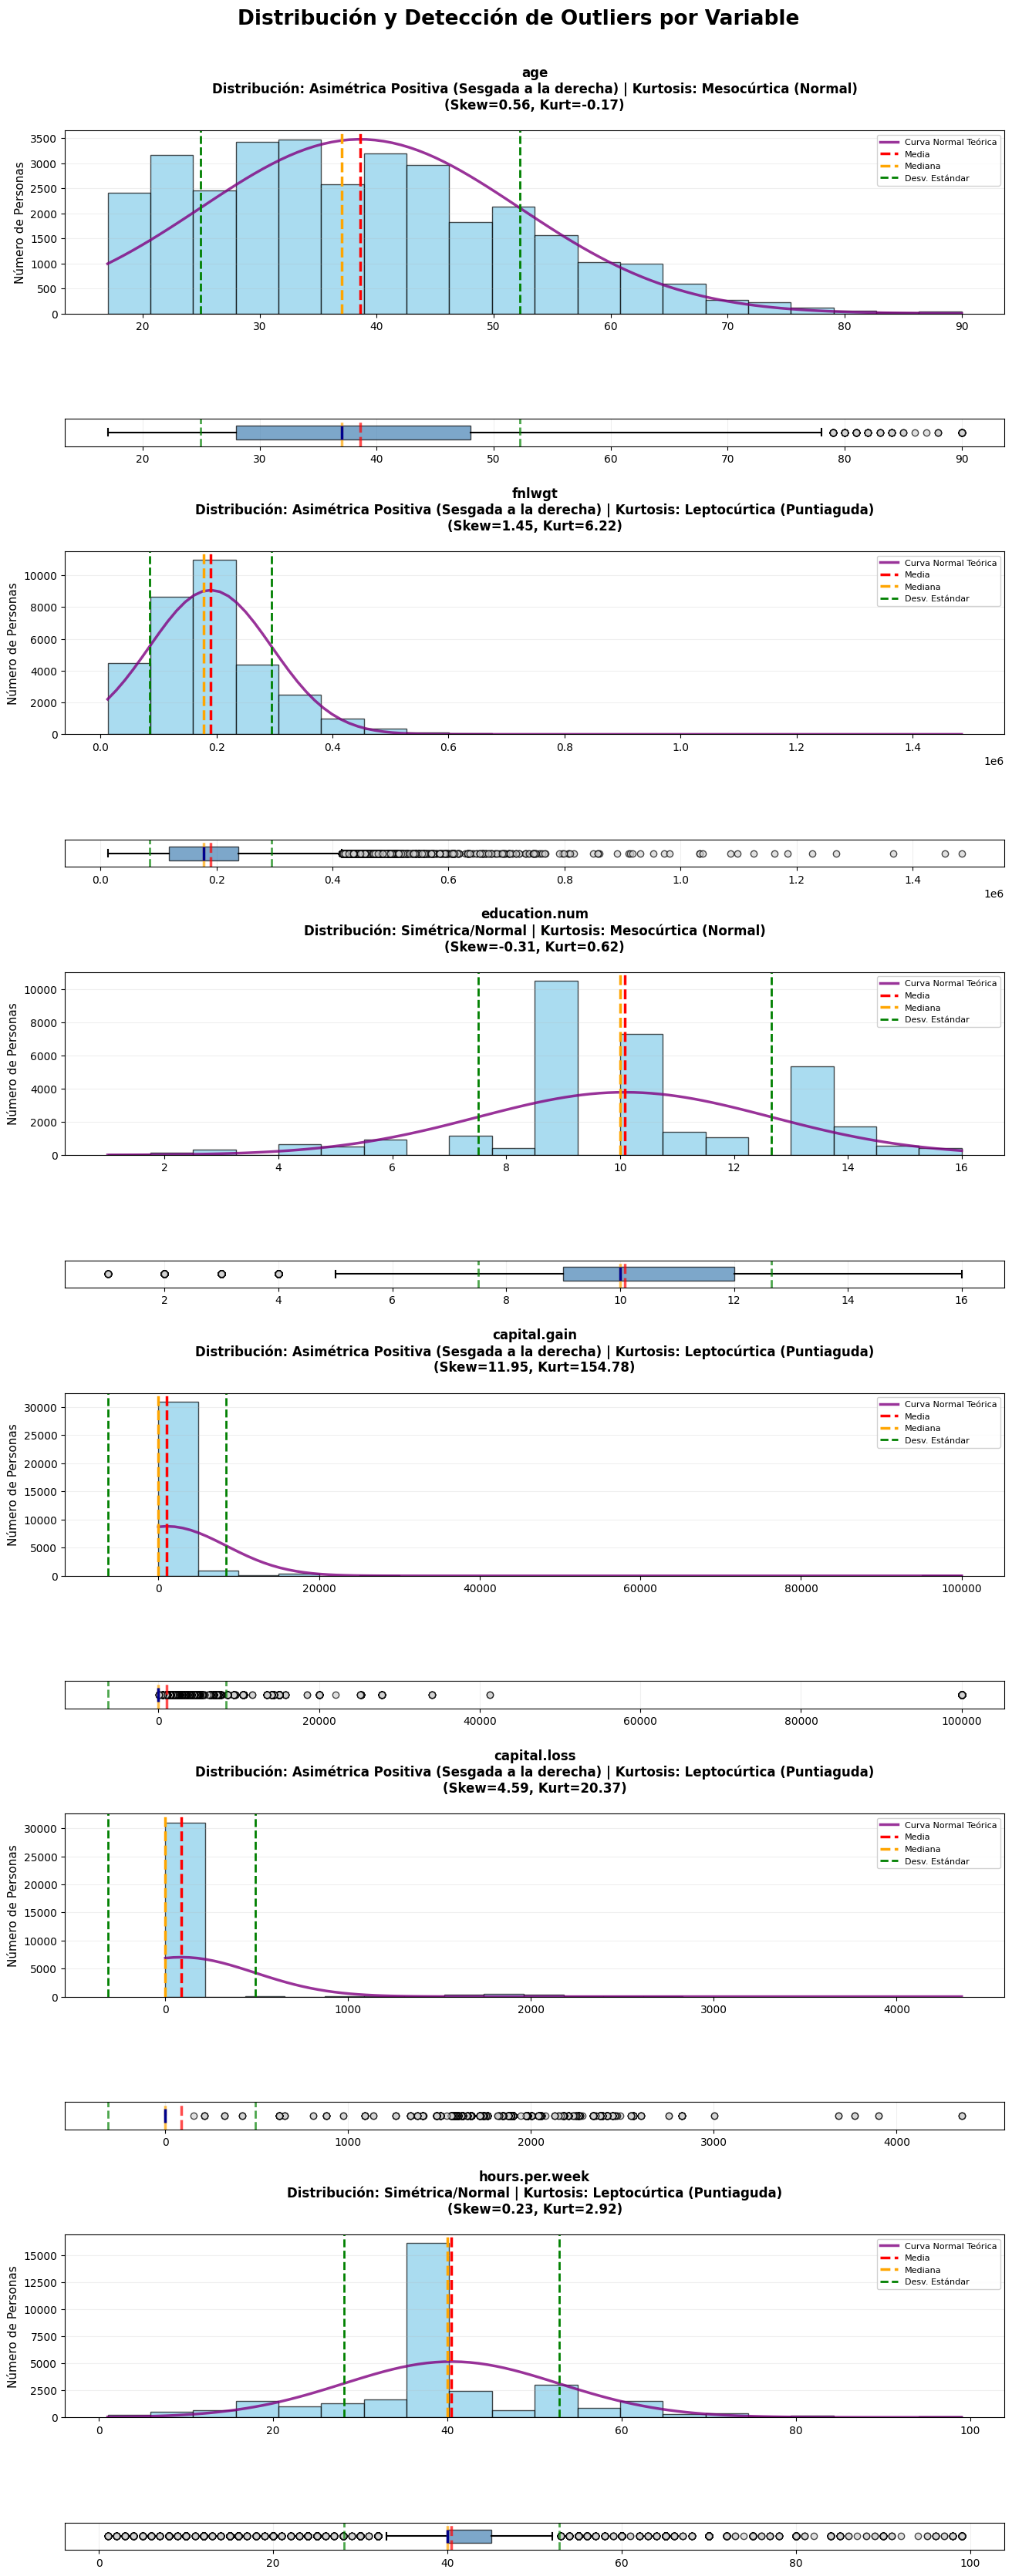

In [7]:
# Histogramas con estadísticas y boxplots
fig = plt.figure(figsize=(14, 50))
gs = fig.add_gridspec(18, 1, hspace=1, height_ratios=[10, 1.5] * 9)

row = 0
for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    # Calcular estadísticas
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skewness = skew(data) 
    kurt = kurtosis(data) 
    
    # Determinar tipo de distribución por skewness
    if abs(skewness) < 0.5:
        dist_type = "Simétrica/Normal"
    elif skewness > 0.5:
        dist_type = "Asimétrica Positiva (Sesgada a la derecha)"
    else:
        dist_type = "Asimétrica Negativa (Sesgada a la izquierda)"
    
    # Determinar tipo de kurtosis
    if kurt > 1:
        kurt_type = "Leptocúrtica (Puntiaguda)"
    elif kurt < -1:
        kurt_type = "Platicúrtica (Achatada)"
    else:
        kurt_type = "Mesocúrtica (Normal)"
    
    # Histograma (fila superior) - CONTEO DE PERSONAS
    ax_hist = fig.add_subplot(gs[row, 0])
    n, bins, patches = ax_hist.hist(data, bins=20, edgecolor='black', alpha=0.7, 
                                      color='skyblue', density=False)
    
    # Superponer curva normal de referencia - ESCALADA AL CONTEO
    x = np.linspace(data.min(), data.max(), 100)
    # Escalar la curva normal para que se ajuste al histograma de conteos
    bin_width = bins[1] - bins[0]  # Ancho de cada barra
    scale_factor = len(data) * bin_width  # Factor de escala
    ax_hist.plot(x, norm.pdf(x, mean_val, std_val) * scale_factor, 
                 color='purple', linewidth=2.5, linestyle='-', 
                 label='Curva Normal Teórica', alpha=0.8)
    
    # Líneas verticales de estadísticas
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, 
                    label=f'Media')
    ax_hist.axvline(median_val, color='orange', linestyle='--', linewidth=2.5, 
                    label=f'Mediana')
    ax_hist.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=2, 
                    label=f'Desv. Estándar')
    ax_hist.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=2)
    
    # Título con tipo de distribución, skewness y kurtosis
    ax_hist.set_title(f'{col}\nDistribución: {dist_type} | Kurtosis: {kurt_type}\n(Skew={skewness:.2f}, Kurt={kurt:.2f})', 
                      fontsize=12, fontweight='bold', pad=20)
    ax_hist.set_ylabel('Número de Personas', fontsize=11)
    ax_hist.legend(fontsize=8, loc='upper right', framealpha=0.9)
    ax_hist.grid(True, alpha=0.2, axis='y')
    
    # Boxplot horizontal (fila inferior)
    ax_box = fig.add_subplot(gs[row + 1, 0])
    bp = ax_box.boxplot(data, vert=False, patch_artist=True, widths=0.5,
                         boxprops=dict(facecolor='steelblue', alpha=0.7, edgecolor='black'),
                         medianprops=dict(color='darkblue', linewidth=2.5),
                         whiskerprops=dict(color='black', linewidth=1.5),
                         capprops=dict(color='black', linewidth=1.5),
                         flierprops=dict(marker='o', markerfacecolor='lightgray', 
                                       markeredgecolor='black', markersize=6, alpha=0.7))
    
    # Proyectar líneas de estadísticas en el boxplot
    ax_box.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, alpha=0.7)
    ax_box.axvline(median_val, color='orange', linestyle='--', linewidth=2.5, alpha=0.7)
    ax_box.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=2, alpha=0.7)
    ax_box.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=2, alpha=0.7)
    
    ax_box.set_xlim(ax_hist.get_xlim())
    ax_box.grid(True, alpha=0.2, axis='x')
    ax_box.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax_box.set_xlabel('')
    
    row += 2

plt.suptitle('Distribución y Detección de Outliers por Variable', 
             fontsize=19, fontweight='bold', y=1.002)
plt.subplots_adjust(top=0.97, bottom=0.015, left=0.08, right=0.95)
plt.show()

# 3 CRIBADO DE VARIABLES 

## 3.1 DFINICIÓN DE OBJETIVO DE ESTUDIO 

El objetivo del sistema de recomendación es sugerir trayectorias educativas y ocupacionales que aumenten la probabilidad de que una persona alcance un ingreso alto (mayor a 50K). El sistema utiliza el perfil socio-demográfico del usuario (edad, educación, ocupación, estado civil, horas trabajadas por semana, relación familiar, raza, sexo y país de origen) para identificar y recomendar los cambios o caminos que lo acerquen al grupo de personas con mayores ingresos.

## 3.2 VERIFICACIÓN DE VALORES ÚNICOS POR CADA COLUMNA Y BÚSQUEDA DE VALORES FALTANTES ENMASCARADOS

In [8]:
# Verificar columnas con valores únicos igual a 1
columnas_un_valor = df.nunique()[df.nunique() == 1]

if len(columnas_un_valor) > 0:
    print("="*50)
    print("COLUMNAS CON VALORES ÚNICOS = 1")
    print("="*50)
    print("\n Nombres de las Columnas:")
    print(columnas_un_valor.index.tolist())
    print(f"\n Total de Columnas con un Solo Valor: {len(columnas_un_valor)}")
else:
    print("="*50)
    print("No hay Columnas con Valores Únicos igual a 1")
    print("="*50)

# Análisis de valores únicos por columna
for columna in df.columns: # → Recorre todas las columnas 
    print(f"\n{'='*25}")
    print(f"COLUMNA: {columna}")
    print(f"{'='*25}")
    print(df[columna].value_counts()) # Muestra cada valor único y cuántas veces aparece, ordenado de mayor a menor frecuencia
    print(f"\nTotal de Valores Únicos: {df[columna].nunique()}") # → Cuenta cuántos valores diferentes hay en total  

No hay Columnas con Valores Únicos igual a 1

COLUMNA: age
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

Total de Valores Únicos: 73

COLUMNA: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Total de Valores Únicos: 9

COLUMNA: fnlwgt
fnlwgt
123011    13
203488    13
164190    13
126675    12
121124    12
          ..
222966     1
301229     1
155382     1
268083     1
113987     1
Name: count, Length: 21648, dtype: int64

Total de Valores Únicos: 21648

COLUMNA: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              

## 3.3 VERIFICACIÓN DE DATOS FALTANTES EN COLUMNAS

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## 3.4 VERIFICACIÓN DE DATOS FALTANTES EN FILAS > 40%

In [10]:
df_filas_faltantes = (df.T.isnull().sum()* 100 / len(df)).round(2)
if df_filas_faltantes[df_filas_faltantes > 0.40].any():
    print(df_filas_faltantes[df_filas_faltantes > 0.40])
else:
    print("No hay Filas con Valores Faltantes > 40 % en el DataSet")

No hay Filas con Valores Faltantes > 40 % en el DataSet


## 3.5 GRÁFICA DE VALORES FALTANTES 

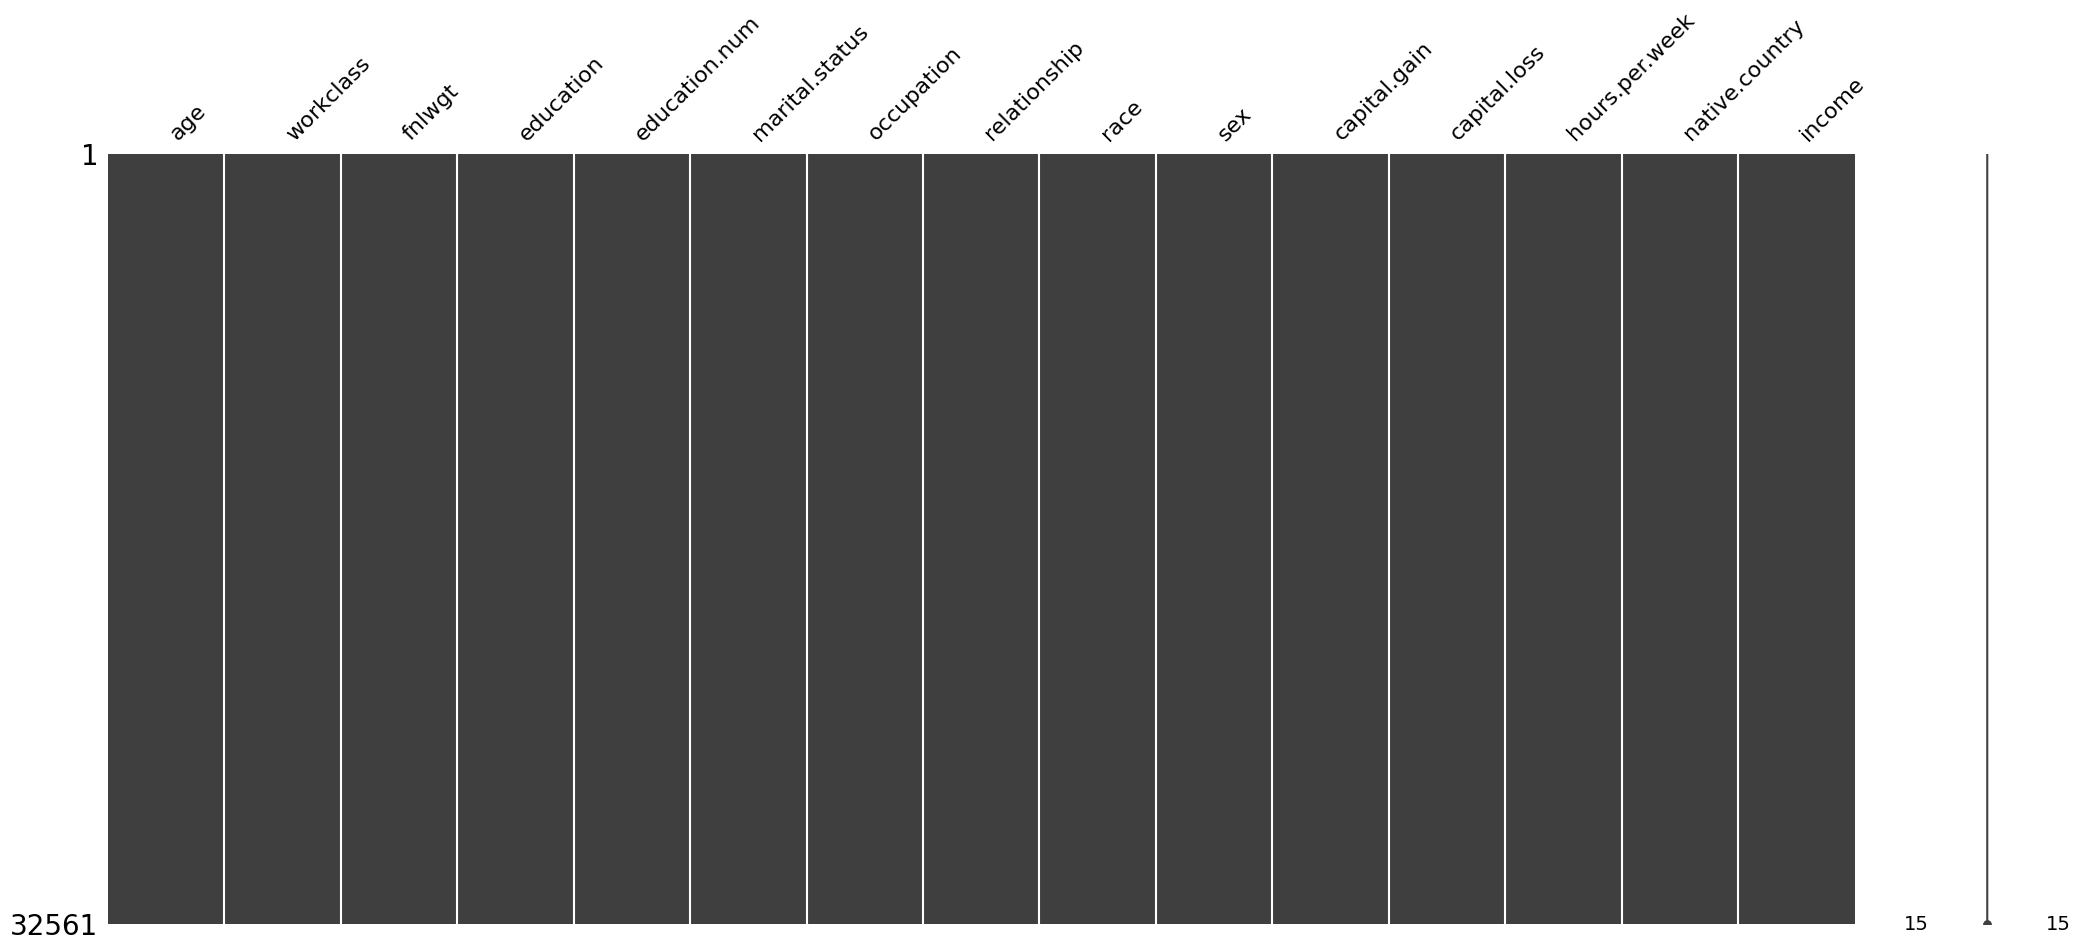

In [11]:
msno.matrix(df)
plt.show()

## 3.6 COMPROBACIÓN DE DATOS DUPLICADOS EN FILAS

In [12]:
filas_duplicadas = df[df.duplicated(keep=False)] # keep=False muestra TODAS las ocurrencias (incluyendo la original)

if len(filas_duplicadas) > 0:
    print(f"Se Encontraron {len(filas_duplicadas)} Filas Duplicadas:")
    print(f"Esto Representa {len(filas_duplicadas)/len(df)*100:.2f}% del DataSet\n")
    print(filas_duplicadas)
else:
    print("No hay Filas Duplicadas en el DataSet")

Se Encontraron 47 Filas Duplicadas:
Esto Representa 0.14% del DataSet

       age         workclass  fnlwgt     education  education.num  \
6227    90           Private   52386  Some-college             10   
7615    19           Private  251579  Some-college             10   
7978    25           Private  308144     Bachelors             13   
8356    21           Private  250051  Some-college             10   
8453    25           Private  308144     Bachelors             13   
8500    38           Private  207202       HS-grad              9   
8645    90           Private   52386  Some-college             10   
9067    27           Private  255582       HS-grad              9   
9269    20           Private  107658  Some-college             10   
9305    25           Private  195994       1st-4th              2   
10307   19           Private  138153  Some-college             10   
10357   49  Self-emp-not-inc   43479  Some-college             10   
11121   49           Private   3

## 3.7 COMPROBACIÓN DE DATOS DUPLICADOS EN COLUMNAS CON LA TRANSPUESTA

In [13]:
columnas_duplicadas = df.T.duplicated(keep=False).sum()

if columnas_duplicadas > 0:
    print(f"\nSe Encontraron {columnas_duplicadas} Columnas Duplicadas")
    print("\nNombres de las Columnas Duplicadas:")
    print(df.T[df.T.duplicated(keep=False)].index)
else:
    print("\nNo hay Columnas Duplicadas en el DataSet")


No hay Columnas Duplicadas en el DataSet


## 3.8 ELIMINACIÓN DE FILAS CON DATOS DUPLICADOS 

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated(keep=False).sum()

np.int64(0)

# 4. TRASNFORMACIÓN DE VARIABLES CATEGÓRICAS

## 4.1 COLUMNAS CON VALORES ANÓMALOS "?"

In [15]:
df.replace("?", pd.NA, inplace=True) # Reemplaza todos los valores "?" en el DataFrame por valores nulos (NA) de pandas.

In [16]:
# Porcentaje de valores nulos por columna
(df.isnull().sum() * 100 / len(df)).round(2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64

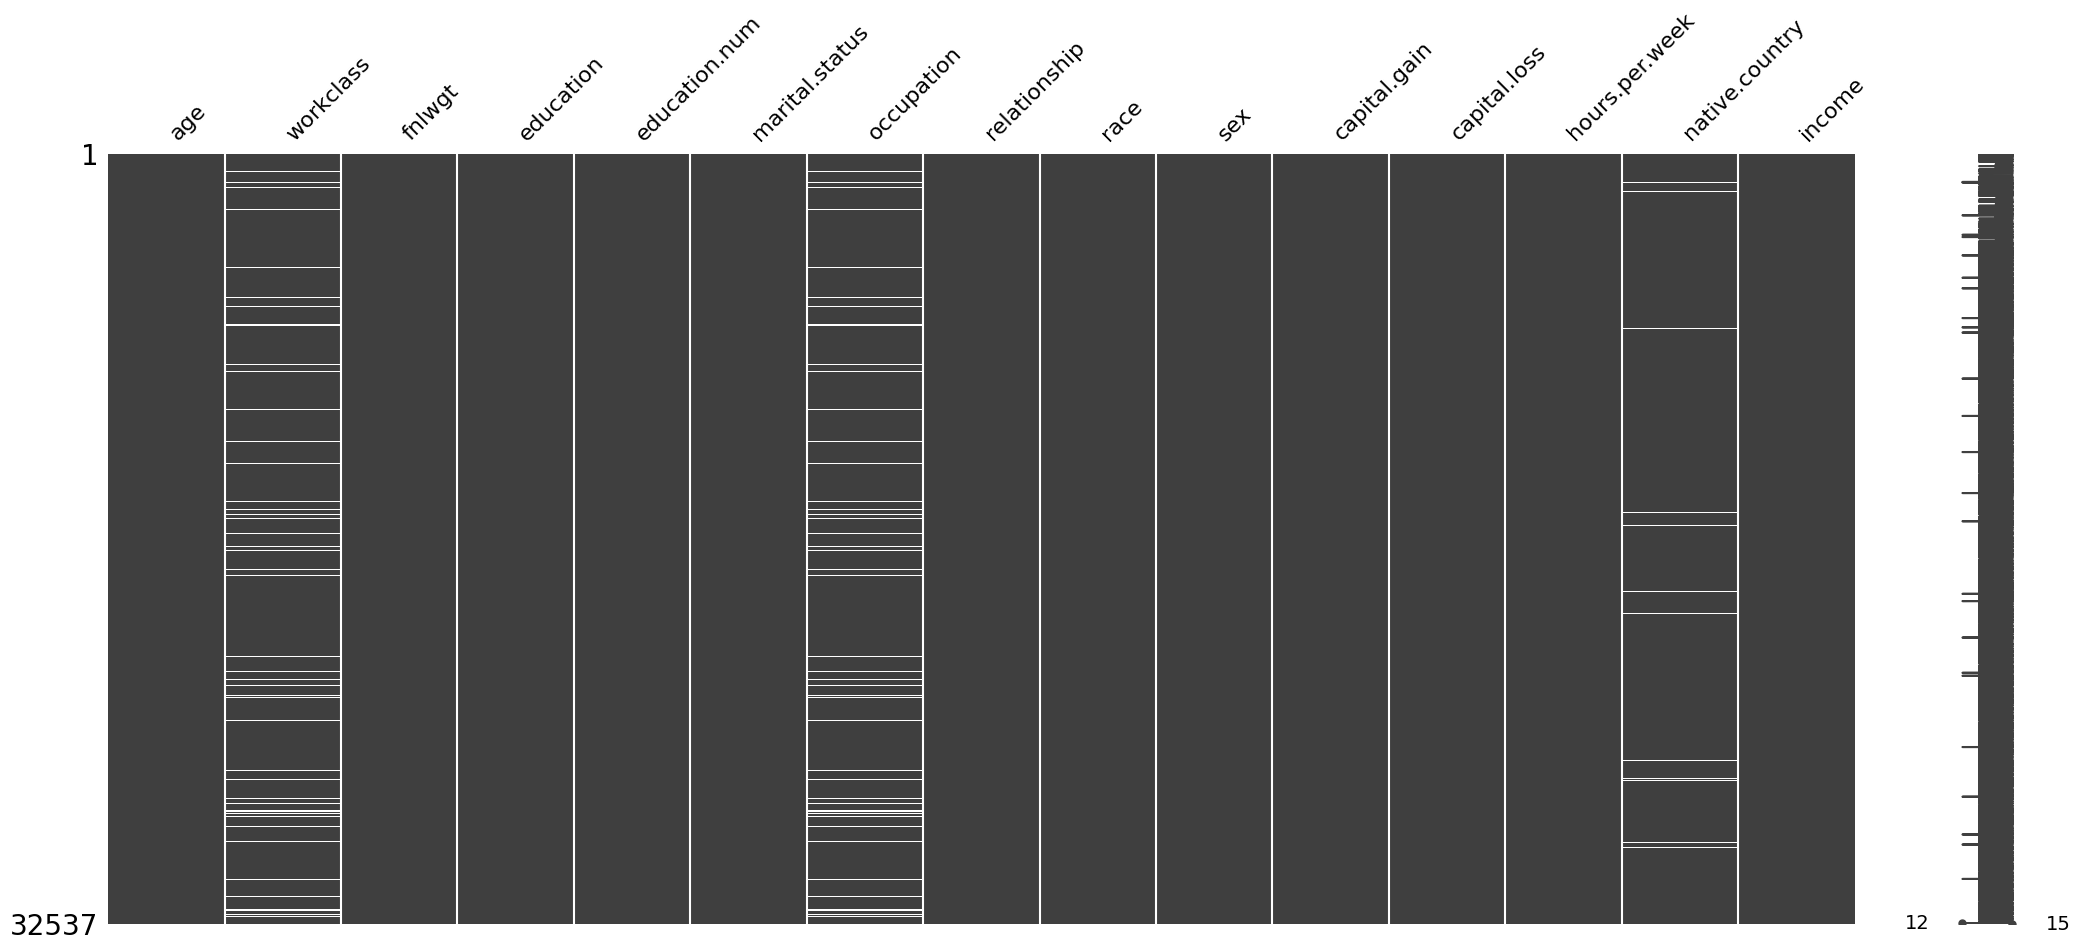

In [17]:
msno.matrix(df)
plt.show()

## 4.2 COLUMNA INCOME

In [18]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0) # Crea una nueva columna 'high_income' que asigna 1 si el valor en 'income' es '>50K' y 0 en caso contrario. 
df['income'].unique()

array([0, 1])

In [19]:
df['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

## 4.3 TRANSFORMACIÓN Y NORMALIZACIÓN DEL RESTO DE VARIABLES 

In [20]:
# Variables numéricas y categóricas según tu análisis
numerical_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Imputar valores nulos en columnas categóricas con 'Desconocido'
for col in categorical_features:
    df[col] = df[col].fillna('Desconocido')
    
# Pipeline de transformación
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
], remainder='drop')  # Solo deja las columnas transformadas

# Aplica la transformación
df_transformed = preprocessor.fit_transform(df)

# Obtén los nombres de las nuevas columnas
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features) if categorical_features else []
all_columns = list(cat_columns) + numerical_features
df_final = pd.DataFrame(df_transformed, columns=all_columns)

df_final.head()

,workclass_Desconocido,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.770003,-1.067955,-0.420679,-0.145975,10.589625,-0.035664
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.183397,-0.539159,-0.420679,-0.145975,10.589625,-1.817516
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.010185,-0.035241,-0.031815,-0.145975,10.589625,-0.035664
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.130276,-0.468210,-2.364998,-0.145975,9.458380,-0.035664
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.177041,0.709415,-0.031815,-0.145975,9.458380,-0.035664


In [21]:
# Renombrar columnas codificadas para que incluyan el nombre original
# Ejemplo: 'workclass_Private' en vez de 'workclass_Private'
def limpiar_nombre(col):
    # Si el nombre ya tiene el formato 'columna_categoria', lo deja igual
    # Si no, lo deja igual (por compatibilidad futura)
    return col.replace('_', '__', 1) if '_' in col else col

cat_columns = [limpiar_nombre(col) for col in cat_columns]
df_final.columns = cat_columns + numerical_features
# Ahora los nombres de las columnas codificadas llevan el nombre original

In [22]:
# Agregar la columna income al DataFrame final
if 'income' in df.columns:
    df_final['income'] = df['income'].values

In [23]:
df_final.head()

,workclass__Desconocido,workclass__Federal-gov,workclass__Local-gov,workclass__Never-worked,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,workclass__State-gov,workclass__Without-pay,education__10th,...,native.country__United-States,native.country__Vietnam,native.country__Yugoslavia,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.770003,-1.067955,-0.420679,-0.145975,10.589625,-0.035664,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.183397,-0.539159,-0.420679,-0.145975,10.589625,-1.817516,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.010185,-0.035241,-0.031815,-0.145975,10.589625,-0.035664,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.130276,-0.468210,-2.364998,-0.145975,9.458380,-0.035664,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.177041,0.709415,-0.031815,-0.145975,9.458380,-0.035664,0


# 5 TRAIN TEST SPLIT

In [24]:
# Seleccionar todas las columnas relacionadas con las variables del perfil
variables_base = [
    'age', 'education.num', 'hours.per.week'
]
# Buscar todas las columnas que contienen los nombres base de las variables categóricas

categorias = ['occupation', 'marital.status', 'relationship', 'race', 'sex', 'native.country']
variables_categoricas = []
for cat in categorias:
    variables_categoricas += [col for col in df_final.columns if col.startswith(cat)]

variables_perfil_completo = variables_base + variables_categoricas

X = df_final[variables_perfil_completo]
y = df_final['income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)
print('Variables incluidas:', X.columns.tolist())

Shape X_train: (26029, 80)
Shape X_test: (6508, 80)
Variables incluidas: ['age', 'education.num', 'hours.per.week', 'occupation__Adm-clerical', 'occupation__Armed-Forces', 'occupation__Craft-repair', 'occupation__Desconocido', 'occupation__Exec-managerial', 'occupation__Farming-fishing', 'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct', 'occupation__Other-service', 'occupation__Priv-house-serv', 'occupation__Prof-specialty', 'occupation__Protective-serv', 'occupation__Sales', 'occupation__Tech-support', 'occupation__Transport-moving', 'marital.status__Divorced', 'marital.status__Married-AF-spouse', 'marital.status__Married-civ-spouse', 'marital.status__Married-spouse-absent', 'marital.status__Never-married', 'marital.status__Separated', 'marital.status__Widowed', 'relationship__Husband', 'relationship__Not-in-family', 'relationship__Other-relative', 'relationship__Own-child', 'relationship__Unmarried', 'relationship__Wife', 'race__Amer-Indian-Eskimo', 'race__Asian-Pac-I

# 6. SISTEMA DE RECOMENDACIÓN BASADO EN CONTENIDO

En este enfoque, representamos a cada usuario como un vector de características socio-demográficas y laborales. Calculamos la similitud (por ejemplo, coseno) entre el perfil de un usuario y los perfiles de personas con ingresos altos (>50K). Así, podemos recomendar cambios en educación, ocupación, etc., que acerquen al usuario a ese grupo.

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Filtrar solo los usuarios con ingreso alto
X_high_income = X_train[y_train == 1]

# Función para recomendar trayectorias a un usuario dado su perfil
# user_vector debe ser un DataFrame de una sola fila con las mismas columnas que X_train

def recomendar_trayectoria(user_vector, X_high_income, top_n=5):
    # Calcula la similitud coseno entre el usuario y todos los perfiles de alto ingreso
    sims = cosine_similarity(user_vector, X_high_income)[0]
    # Encuentra los perfiles más similares
    idx_top = np.argsort(sims)[-top_n:][::-1]
    recomendaciones = X_high_income.iloc[idx_top]
    return recomendaciones


In [26]:
# Ejemplo de uso con el primer usuario del test
usuario_ejemplo = X_test.iloc[[0]]
recomendaciones = recomendar_trayectoria(usuario_ejemplo, X_high_income, top_n=5)
print('Perfil del usuario ejemplo:')
print(usuario_ejemplo)
print('\nPerfiles de alto ingreso más similares:')
print(recomendaciones)

Perfil del usuario ejemplo:
          age  education.num  hours.per.week  occupation__Adm-clerical  \
3643  1.05695      -0.031815       -0.035664                       0.0   

      occupation__Armed-Forces  occupation__Craft-repair  \
3643                       0.0                       0.0   

      occupation__Desconocido  occupation__Exec-managerial  \
3643                      0.0                          0.0   

      occupation__Farming-fishing  occupation__Handlers-cleaners  ...  \
3643                          0.0                            0.0  ...   

      native.country__Portugal  native.country__Puerto-Rico  \
3643                       0.0                          0.0   

      native.country__Scotland  native.country__South  native.country__Taiwan  \
3643                       0.0                    0.0                     0.0   

      native.country__Thailand  native.country__Trinadad&Tobago  \
3643                       0.0                              0.0   

     

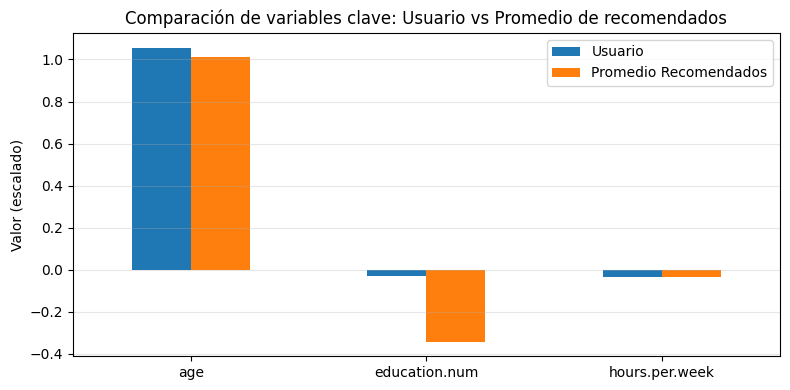

--- Sugerencias para acercarse a un perfil de alto ingreso ---
Tu 'age' ya es similar al de los perfiles de alto ingreso.
Podrías considerar reducir tu 'education.num' (actual: -0.03, recomendado: -0.34)
Tu 'hours.per.week' ya es similar al de los perfiles de alto ingreso.


In [27]:
# Visualización y comparación de diferencias clave entre el usuario y los perfiles recomendados
import matplotlib.pyplot as plt
import seaborn as sns
 
# Selecciona variables clave para comparar (puedes ajustar esta lista)
variables_clave = ['age', 'education.num', 'hours.per.week']
 
# Extrae los valores del usuario y de los recomendados
usuario_vals = usuario_ejemplo[variables_clave].iloc[0]
recomendados_vals = recomendaciones[variables_clave]
 
# Gráfico de barras comparando usuario vs recomendados (media de recomendados)
plt.figure(figsize=(8,4))
media_recomendados = recomendados_vals.mean()
df_plot = pd.DataFrame({'Usuario': usuario_vals, 'Promedio Recomendados': media_recomendados})
df_plot.plot(kind='bar', ax=plt.gca())
plt.title('Comparación de variables clave: Usuario vs Promedio de recomendados')
plt.ylabel('Valor (escalado)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
 
# Mensaje textual de sugerencias
print('--- Sugerencias para acercarse a un perfil de alto ingreso ---')
for var in variables_clave:
    valor_usuario = usuario_vals[var]
    valor_recomendado = media_recomendados[var]
    if abs(valor_usuario - valor_recomendado) > 0.1:
        if valor_usuario < valor_recomendado:
            print(f"Podrías considerar aumentar tu '{var.replace('_',' ')}' (actual: {valor_usuario:.2f}, recomendado: {valor_recomendado:.2f})")
        else:
            print(f"Podrías considerar reducir tu '{var.replace('_',' ')}' (actual: {valor_usuario:.2f}, recomendado: {valor_recomendado:.2f})")
    else:
        print(f"Tu '{var.replace('_',' ')}' ya es similar al de los perfiles de alto ingreso.")